<h1 align= center; style="color: white;background-color:black;
         font-size:47px; font-weight:bold;padding:20px;
    font-style:italic;border:3px  solid black;
    box-shadow:2px 2px 5px gray;text-align:center;border-radius:5px;
">  MENTAL HEALTH  AND SOCIAL MEDIA DATASET </span></h1>


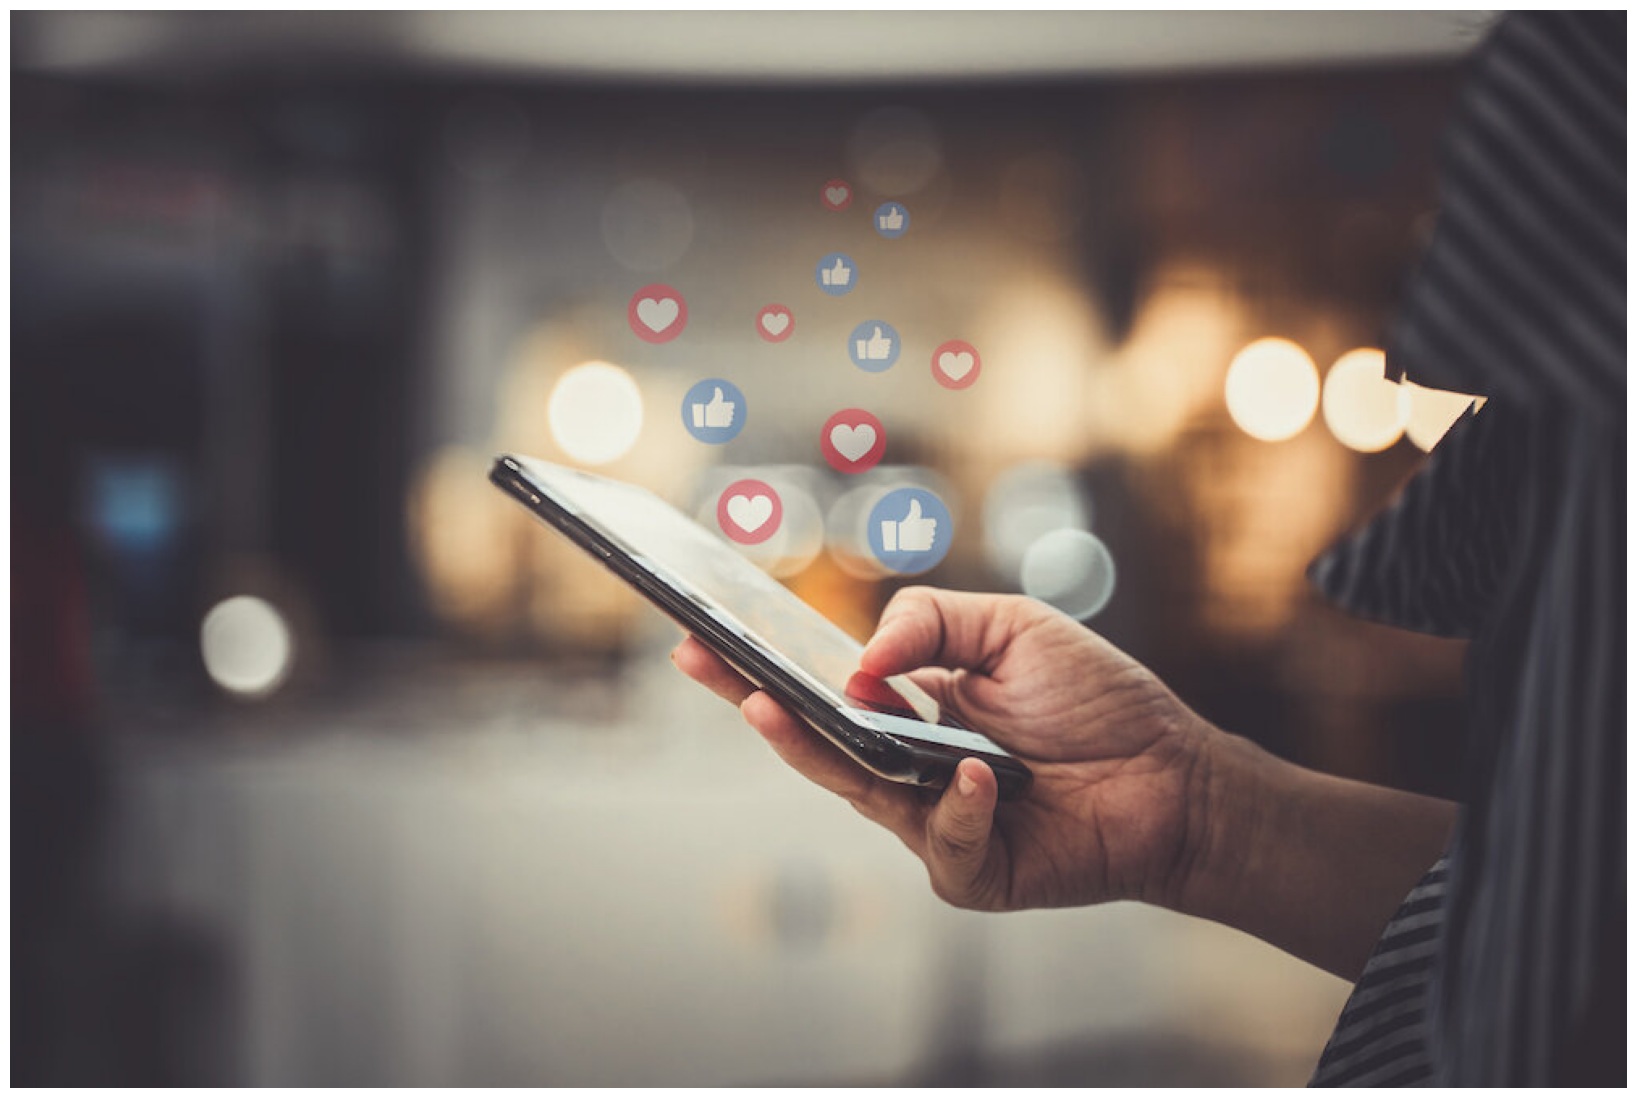

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


img = mpimg.imread(r"C:\\Users\\hp\\Desktop\\projects\\socialmedia.jpeg")

plt.figure(figsize=(22, 14))   # Bigger = larger image
plt.imshow(img)
plt.axis('off')

plt.show()

<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Importing Libraries</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingClassifier
from tabulate import tabulate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score             
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



 <h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Reading the Dataset</h1>

In [3]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Mental_Health_and_Social_Media_Balance_Dataset.csv")

In [4]:
df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5.0,7.0,4.0,2.0,X (Twitter),10.0
496,U497,43,Female,5.6,7.0,6.0,5.0,2.0,Facebook,9.0
497,U498,41,Male,7.7,5.0,7.0,2.0,2.0,LinkedIn,8.0
498,U499,23,Male,4.2,9.0,7.0,0.0,2.0,Facebook,9.0


##### A unique identifier assigned to each person in the dataset.
##### The age of the individual (in years).
##### The gender of the individual.
##### Average number of hours the person spends on a screen each day.
##### Self-reported score of how well the person sleeps. Scale: 1 = very poor sleep, 10 = excellent sleep
##### Self-reported score for daily stress level.Scale: 1 = no stress, 10 = extremely stressed
##### How many days they avoided social media recently.
##### How many days per week the person exercises.
##### The primary social media platform the user spends the most time on.
##### Self-reported happiness score. Scale: 1 = very unhappy, 10 = very happy

 <h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;"> Checking Shape </h1>

In [5]:
df.shape

(500, 10)

 <h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Checking info and describe </h1> 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    float64
 5   Stress_Level(1-10)         500 non-null    float64
 6   Days_Without_Social_Media  500 non-null    float64
 7   Exercise_Frequency(week)   500 non-null    float64
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 39.2+ KB


In [7]:
df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000



<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;"> Checking Unique Values in each Column </h1> 

In [8]:
col=df.columns
for i in col:
    u=df[i].unique()
    print(f'unique values in {i}:',u)

unique values in User_ID: ['U001' 'U002' 'U003' 'U004' 'U005' 'U006' 'U007' 'U008' 'U009' 'U010'
 'U011' 'U012' 'U013' 'U014' 'U015' 'U016' 'U017' 'U018' 'U019' 'U020'
 'U021' 'U022' 'U023' 'U024' 'U025' 'U026' 'U027' 'U028' 'U029' 'U030'
 'U031' 'U032' 'U033' 'U034' 'U035' 'U036' 'U037' 'U038' 'U039' 'U040'
 'U041' 'U042' 'U043' 'U044' 'U045' 'U046' 'U047' 'U048' 'U049' 'U050'
 'U051' 'U052' 'U053' 'U054' 'U055' 'U056' 'U057' 'U058' 'U059' 'U060'
 'U061' 'U062' 'U063' 'U064' 'U065' 'U066' 'U067' 'U068' 'U069' 'U070'
 'U071' 'U072' 'U073' 'U074' 'U075' 'U076' 'U077' 'U078' 'U079' 'U080'
 'U081' 'U082' 'U083' 'U084' 'U085' 'U086' 'U087' 'U088' 'U089' 'U090'
 'U091' 'U092' 'U093' 'U094' 'U095' 'U096' 'U097' 'U098' 'U099' 'U100'
 'U101' 'U102' 'U103' 'U104' 'U105' 'U106' 'U107' 'U108' 'U109' 'U110'
 'U111' 'U112' 'U113' 'U114' 'U115' 'U116' 'U117' 'U118' 'U119' 'U120'
 'U121' 'U122' 'U123' 'U124' 'U125' 'U126' 'U127' 'U128' 'U129' 'U130'
 'U131' 'U132' 'U133' 'U134' 'U135' 'U136' 'U137' '


<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">  Checking null values </h1> 

In [9]:
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64


<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">  Outlier Detection </h1> 

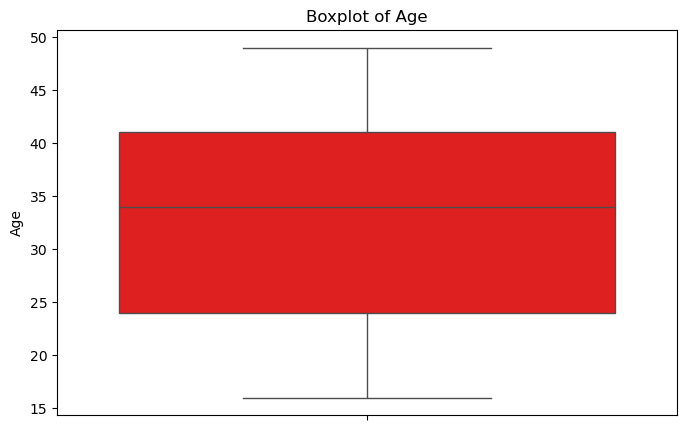

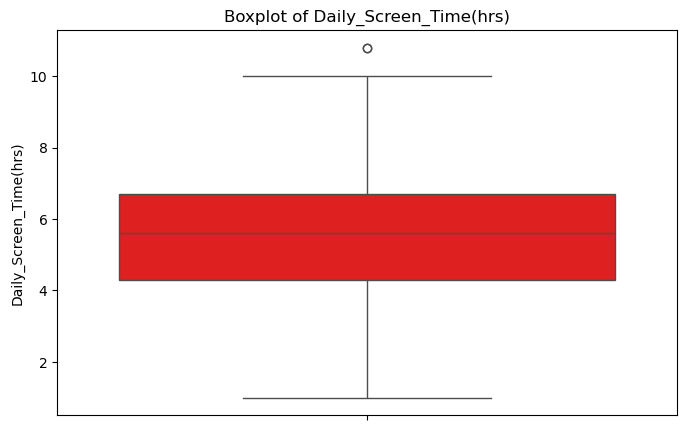

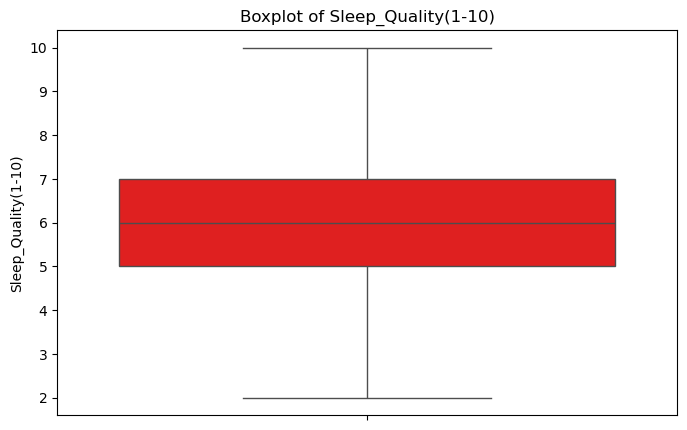

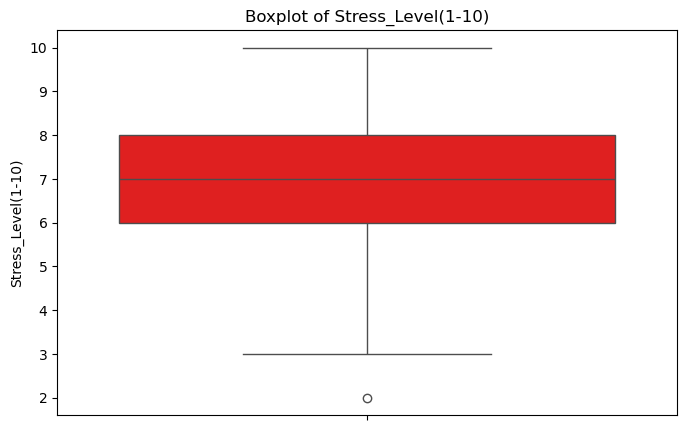

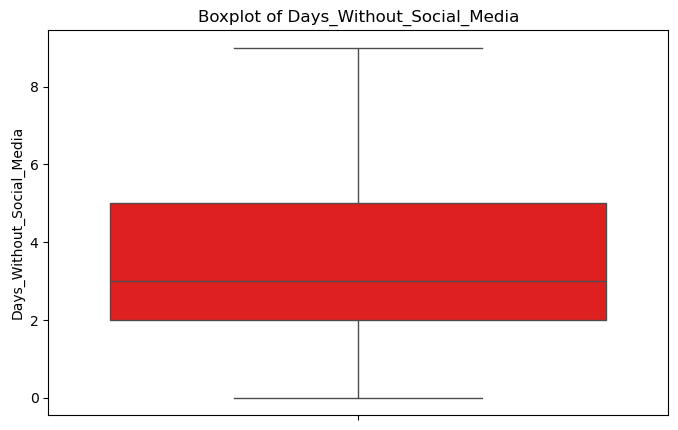

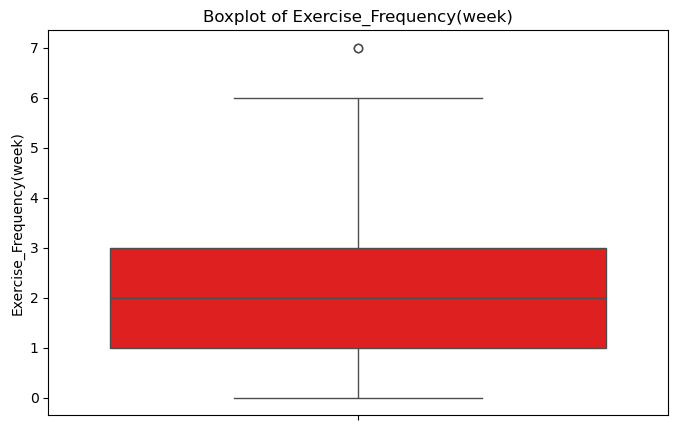

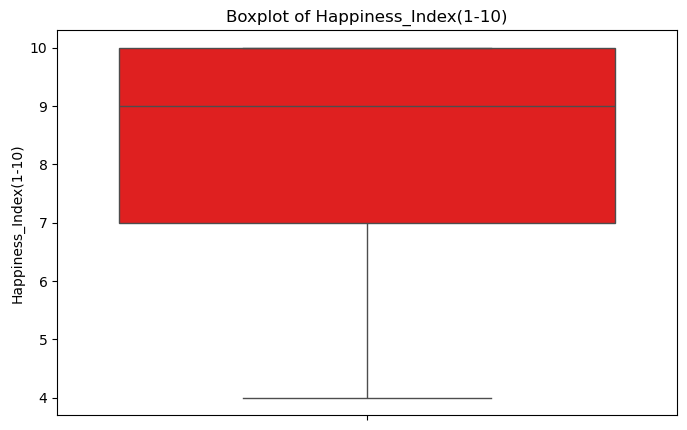

In [10]:
num_cols = ['Age','Daily_Screen_Time(hrs)','Sleep_Quality(1-10)','Stress_Level(1-10)','Days_Without_Social_Media',
            'Exercise_Frequency(week)','Happiness_Index(1-10)']
for col in num_cols:
    plt.figure(figsize=(8, 5))

    sns.boxplot(df[col],color='red')
    plt.title(f'Boxplot of {col}')
    plt.show()

##### outliers present in boxplot Daily_Screen_Time(hrs),Exercise_Frequency(week),Stress_Level(1-10)
Boxplots showed a few minor outliers in the numerical features, but none were extreme. These values represent natural variation, so no outlier removal or capping was required.

<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">   Feature Engineering </h1> 

In [11]:
# Convert Happiness Index into categorical levels
def convert_happiness(score):
    if score <= 4:
        return 'Low'
    elif score <= 6:
        return 'Medium'
    else:
        return 'High'

# Apply conversion
df['Happiness_level'] = df['Happiness_Index(1-10)'].apply(convert_happiness)


In [12]:
df.drop('Happiness_Index(1-10)', axis=1, inplace=True)



<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">   Data Visualization </h1> 


<h2 style="background-color:black; color:white; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">   i. Univariate </h1> 

### Hist plot

<Axes: xlabel='Age', ylabel='Count'>

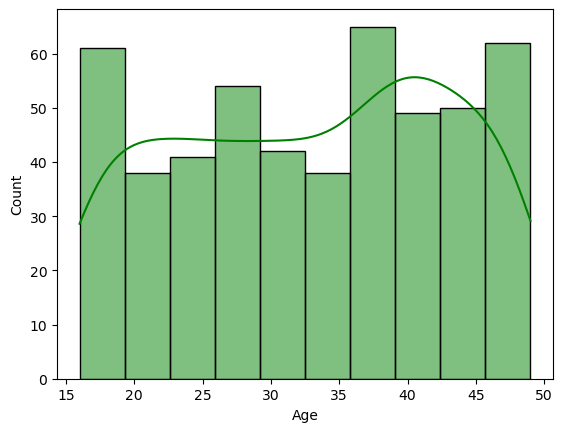

In [13]:
sns.histplot(df['Age'], kde=True,color='green')


 ##### Histogram with KDE showing age distribution, highlighting that most participants are young adults.


### Count plot

C:\Users\hp\AppData\Local\Temp\ipykernel_7860\3517548924.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Gender'], palette='pastel')


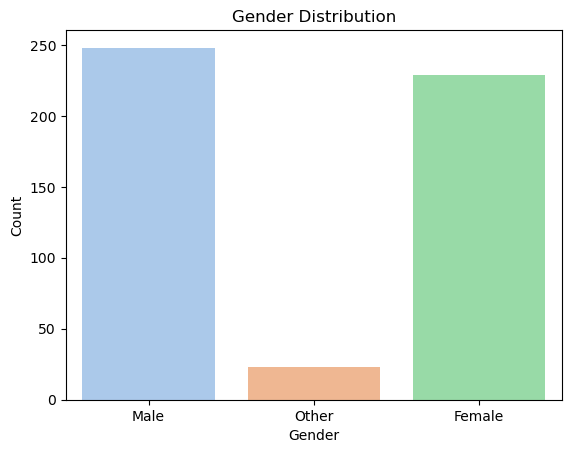

In [14]:
sns.countplot(x=df['Gender'], palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


The countplot clearly shows that male participants are higher in number compared to Female participants in the dataset.

In [15]:
df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_level
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,High
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,High
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,Medium
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,High
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),High
...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5.0,7.0,4.0,2.0,X (Twitter),High
496,U497,43,Female,5.6,7.0,6.0,5.0,2.0,Facebook,High
497,U498,41,Male,7.7,5.0,7.0,2.0,2.0,LinkedIn,High
498,U499,23,Male,4.2,9.0,7.0,0.0,2.0,Facebook,High


<h2 style="background-color:black; color:white; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">   ii.Bivariate </h1> 


<h2><font color='green'> Scatter plot</font></h1>

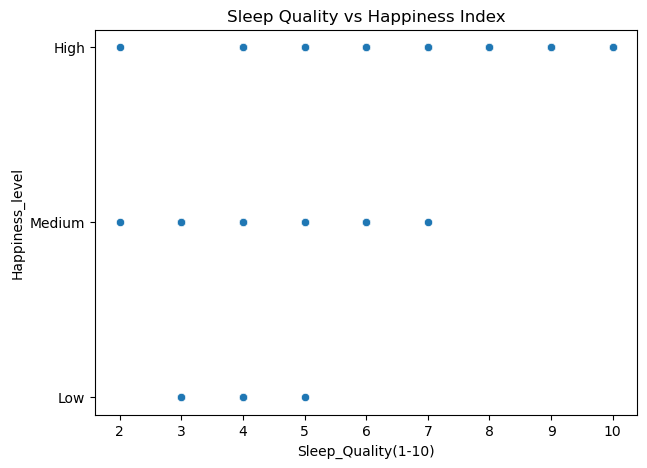

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Sleep_Quality(1-10)', y='Happiness_level', data=df)
plt.title("Sleep Quality vs Happiness Index")
plt.show()

The scatter plot indicates a positive association between sleep quality and happiness level. Participants who reported better sleep tend to fall in the higher happiness category. 


<h2><font color='green'> violin plot</font></h1>

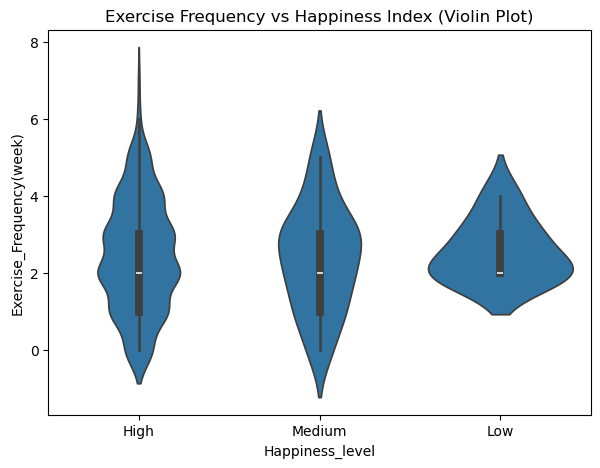

In [17]:
plt.figure(figsize=(7,5))
sns.violinplot(x='Happiness_level', 
               y='Exercise_Frequency(week)',
               data=df)
plt.title("Exercise Frequency vs Happiness Index (Violin Plot)")
plt.show()

The violin plot shows that individuals with higher happiness levels are more physically active on a weekly basis. In contrast, those in the low happiness group exhibit lower exercise frequency. This highlights the potential effect of regular exercise in boosting mood and maintaining positive mental health.

<h2><font color='green'> Box plot</font></h1>

C:\Users\hp\AppData\Local\Temp\ipykernel_7860\2847560080.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


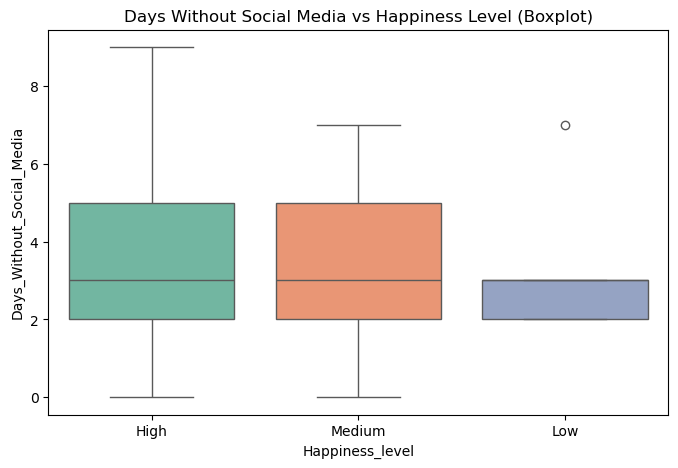

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='Happiness_level',
    y='Days_Without_Social_Media',
    data=df,
    palette='Set2'
)
plt.title("Days Without Social Media vs Happiness Level (Boxplot)")
plt.show()

Individuals with High Happiness Level tend to stay more days without social media compared to those with Medium or Low happiness.

Participants with Low Happiness Level show smaller variation and cannot stay away from social media for long, indicating dependence.

The Median is highest for the High happiness group → suggests a healthier digital balance.
People who are happier are less dependent on social media, while those with lower happiness tend to rely more on social media


<h2 style="background-color:black; color:white; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">  Multivariate </h1> 


<h2><font color='green'>  Heat mapt</font></h1>

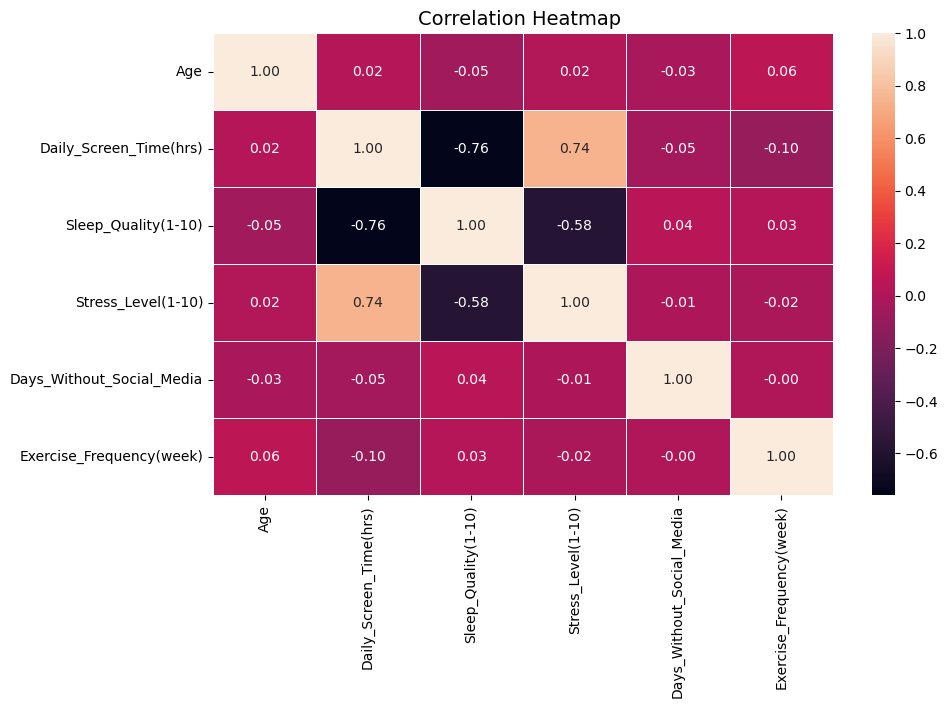

In [19]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap ', fontsize=14)
plt.show()



Displays correlation relationships between continuous mental health and lifestyle features

<h2><font color='green'> Pair plot</font></h1>

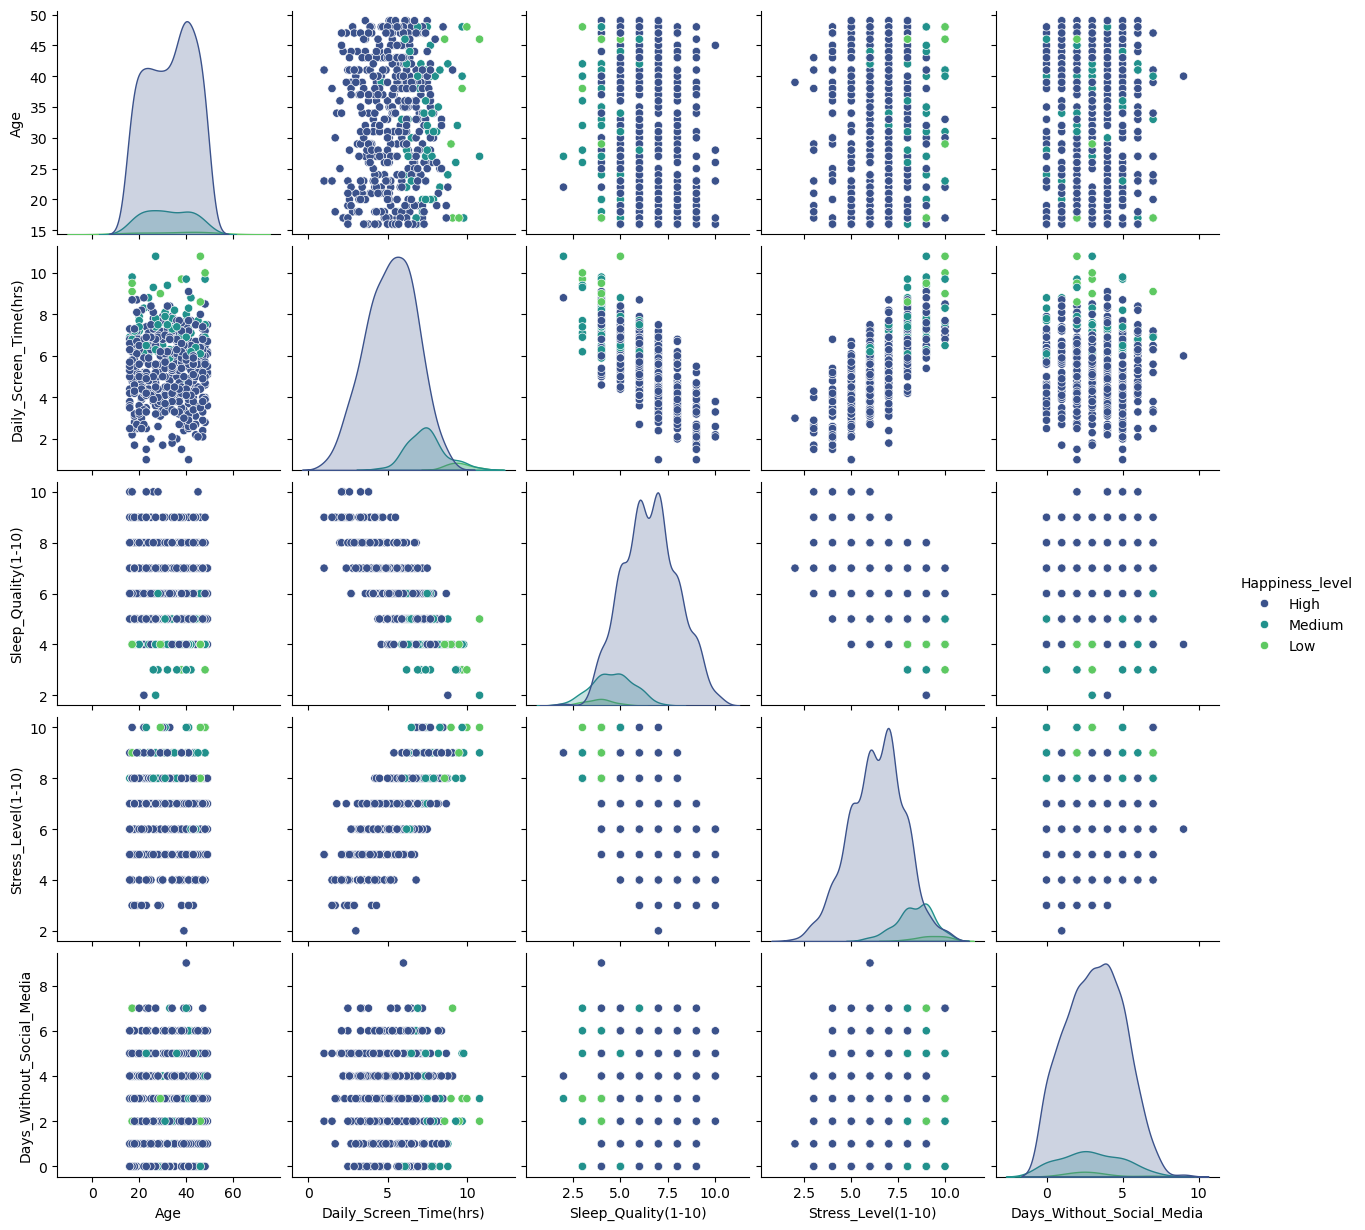

In [20]:
sns.pairplot(df, 
             vars=['Age','Daily_Screen_Time(hrs)','Sleep_Quality(1-10)',
                   'Stress_Level(1-10)','Days_Without_Social_Media'],
             hue='Happiness_level',
             palette='viridis')
plt.show()

The Pairplot reveals that users who spend more time on social media tend to experience higher stress, poorer sleep, and lower happiness. Meanwhile, those who reduce screen time and maintain healthy sleep patterns show higher levels of happiness. This supports the project’s objective: social media usage has a measurable impact on mental health.

In [21]:
df=df.drop(columns=['User_ID','Social_Media_Platform'],axis=1)

In [22]:
df

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_level
0,44,Male,3.1,7.0,6.0,2.0,5.0,High
1,30,Other,5.1,7.0,8.0,5.0,3.0,High
2,23,Other,7.4,6.0,7.0,1.0,3.0,Medium
3,36,Female,5.7,7.0,8.0,1.0,1.0,High
4,34,Female,7.0,4.0,7.0,5.0,1.0,High
...,...,...,...,...,...,...,...,...
495,23,Male,6.9,5.0,7.0,4.0,2.0,High
496,43,Female,5.6,7.0,6.0,5.0,2.0,High
497,41,Male,7.7,5.0,7.0,2.0,2.0,High
498,23,Male,4.2,9.0,7.0,0.0,2.0,High



<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;"> Encoding </h1> 

In [23]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [24]:
happiness_order = [['Low', 'Medium', 'High']]
ord_enc = OrdinalEncoder(categories=happiness_order)

df['Happiness_level'] = ord_enc.fit_transform(df[['Happiness_level']])
#The Happiness_level column represents levels in a natural order (Low < Medium < High).
#To preserve this ranking in ML models, Ordinal Encoding is applied.

In [25]:
df

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_level
0,44,1,3.1,7.0,6.0,2.0,5.0,2.0
1,30,2,5.1,7.0,8.0,5.0,3.0,2.0
2,23,2,7.4,6.0,7.0,1.0,3.0,1.0
3,36,0,5.7,7.0,8.0,1.0,1.0,2.0
4,34,0,7.0,4.0,7.0,5.0,1.0,2.0
...,...,...,...,...,...,...,...,...
495,23,1,6.9,5.0,7.0,4.0,2.0,2.0
496,43,0,5.6,7.0,6.0,5.0,2.0,2.0
497,41,1,7.7,5.0,7.0,2.0,2.0,2.0
498,23,1,4.2,9.0,7.0,0.0,2.0,2.0



<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;"> Model Building</h1> 

In [26]:
x=df.drop('Happiness_level',axis=1)
x

,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week)
0,44,1,3.1,7.0,6.0,2.0,5.0
1,30,2,5.1,7.0,8.0,5.0,3.0
2,23,2,7.4,6.0,7.0,1.0,3.0
3,36,0,5.7,7.0,8.0,1.0,1.0
4,34,0,7.0,4.0,7.0,5.0,1.0
...,...,...,...,...,...,...,...
495,23,1,6.9,5.0,7.0,4.0,2.0
496,43,0,5.6,7.0,6.0,5.0,2.0
497,41,1,7.7,5.0,7.0,2.0,2.0
498,23,1,4.2,9.0,7.0,0.0,2.0


In [27]:
y=df["Happiness_level"]

In [28]:
y

0      2.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
495    2.0
496    2.0
497    2.0
498    2.0
499    2.0
Name: Happiness_level, Length: 500, dtype: float64

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


<h2><font color='yellow'> Logistic Regression</font>

In [30]:
model=LogisticRegression()
model=model.fit(x_train,y_train)
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
acc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.89


<h2><font color='yellow'> Random Forest</font>

In [31]:
model1=RandomForestClassifier(n_estimators=100,random_state=42)
model1=model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)


In [32]:
acc1=accuracy_score(y_test,y_pred1)
acc1

0.9


<h2><font color='yellow'> Decision Tree</font>

In [33]:
model2=DecisionTreeClassifier(random_state=42,max_depth=5)
model2=model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred2)
acc2

0.91


<h2><font color='yellow'> SVM</font>

In [34]:
svc_linear=SVC(kernel='linear')
svc_linear=svc_linear.fit(x_train,y_train)
y_svcl=svc_linear.predict(x_test)
acc_svcl=accuracy_score(y_test,y_svcl)
acc_svcl

0.88

In [35]:
svc_rbf=SVC(kernel='rbf')
svc_rbf=svc_rbf.fit(x_train,y_train)
y_svcr=svc_rbf.predict(x_test)
acc_svcr=accuracy_score(y_test,y_svcr)
acc_svcr

0.86


<h2><font color='yellow'> KNN</font>

In [36]:
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_prediction=classifier.predict(x_test)
    acc_k=accuracy_score(y_test,y_prediction)
    metric_k.append(acc_k)

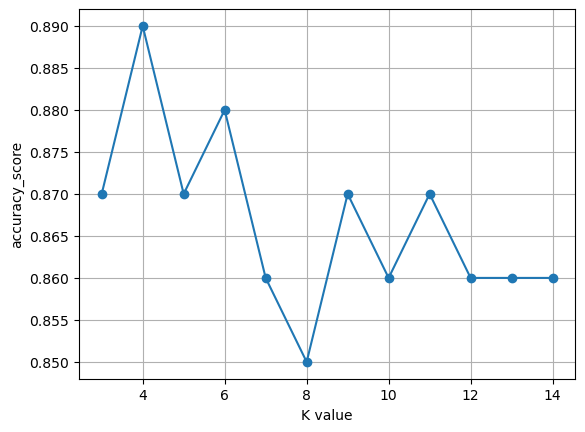

In [37]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K value')
plt.ylabel('accuracy_score')
plt.grid()


In [38]:
classifier=KNeighborsClassifier(n_neighbors=4,metric='euclidean')
knn=classifier.fit(x_train,y_train)
y_prediction=classifier.predict(x_test)
KNN_acc=accuracy_score(y_test,y_prediction)
KNN_acc

0.89


<h2><font color='yellow'> XG BOOST</font>


In [39]:
model_xgb=XGBClassifier()
model_xgb=model_xgb.fit(x_train,y_train)
y_xgb=model_xgb.predict(x_test)
acc_xgb=accuracy_score(y_test,y_xgb)
acc_xgb

0.85


<h2><font color='yellow'> CATBOOST</font>

In [40]:
model_cat=CatBoostClassifier(verbose=0)
model_cat=model_cat.fit(x_train,y_train)
y_cat=model_cat.predict(x_test)
acc_cat=accuracy_score(y_test,y_cat)
acc_cat

0.88


<h2><font color='yellow'> LIGHT GBM</font>

In [41]:
model_lgb= lgb.LGBMClassifier(verbose=-1)
model_lgb=model_lgb.fit(x_train,y_train)
y_lgb=model_lgb.predict(x_test)
acc_lgb=accuracy_score(y_test,y_lgb)
acc_lgb


0.89


<h2><font color='yellow'> Gradient Boosting</font>

In [42]:
gb_model = GradientBoostingClassifier()
gb_model.fit(x_train, y_train)
y_gb = gb_model.predict(x_test)
acc_gb= accuracy_score(y_test, y_gb)
acc_gb




0.88

In [43]:
table=[['model','Accuracy'],['Logistic Regression',acc],
       ['Random Forest',acc1],['Decision Tree',acc2],
       ['SVC[linear]',acc_svcl],['SVC[rbf]',acc_svcr],
       ['KNN',KNN_acc],['XG BOOST',acc_xgb],['CAT BOOST',acc_cat],['LIGHT GBM',acc_lgb],['Gradient Boosting',acc_gb]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │       0.89 │
├─────────────────────┼────────────┤
│ Random Forest       │       0.9  │
├─────────────────────┼────────────┤
│ Decision Tree       │       0.91 │
├─────────────────────┼────────────┤
│ SVC[linear]         │       0.88 │
├─────────────────────┼────────────┤
│ SVC[rbf]            │       0.86 │
├─────────────────────┼────────────┤
│ KNN                 │       0.89 │
├─────────────────────┼────────────┤
│ XG BOOST            │       0.85 │
├─────────────────────┼────────────┤
│ CAT BOOST           │       0.88 │
├─────────────────────┼────────────┤
│ LIGHT GBM           │       0.89 │
├─────────────────────┼────────────┤
│ Gradient Boosting   │       0.88 │
╘═════════════════════╧════════════╛



<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">  Randomized hyperparameter tuning for Decision Tree </h1> 

 The tuning process helped control overfitting, leading to a more generalized model. Although the accuracy reduced, the tuned model is more stable and less sensitive to noise, which makes it more reliable for real-world predictions.

In [44]:
param_dist={'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
           }
model = DecisionTreeClassifier( random_state=42)

In [45]:
random_search = RandomizedSearchCV(
estimator=model2,
    param_distributions=param_dist,
    n_iter=20,       # Number of combinations to try
    cv=5,            # 5-fold cross validation
    scoring='accuracy',
    random_state=42,
    n_jobs=-1 )   


In [46]:
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=5,
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 10, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [47]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 3, 'criterion': 'entropy'}
Best Score: 0.8825000000000001



<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">Grid-based hyperparameter tuning for Decision Tree </h1> 

In [48]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [49]:
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [50]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Accuracy: 0.885


After applying RandomizedSearchCV and GridSearchCV for hyperparameter tuning, the model accuracy slightly decreased compared to the default Decision Tree model. This indicates that the initial model was already performing near optimal on this dataset.


<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;"> Model Evaluation Metrics </h1> 


<h2><font color='yellow'>accuracy score</font>

In [51]:
model2=DecisionTreeClassifier(random_state=42,max_depth=5)
model2=model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
acc2=accuracy_score(y_test,y_pred2)
acc2

0.91


<h2><font color='yellow'> precision score</font>

In [52]:

pre_s=precision_score(y_test,y_pred2, average='weighted') #precision_score() default is for binary class → average='binary'
pre_s
#model has three classes (Low, Medium, High) in the target column, but precision_score() by default works only for binary classification,.
#We must specify an averaging method (like 'weighted', 'macro', or 'micro') to correctly calculate precision for multiclass data

0.9125187265917603


<h2><font color='yellow'>recall score</font>

In [53]:
re_s=recall_score(y_test,y_pred2,average='weighted')
re_s

0.91


<h2><font color='yellow'> f1 score</font>

In [54]:
f1_s=f1_score(y_test,y_pred2,average='weighted')
f1_s

0.9048857142857143


<h2><font color='yellow'> confusion matrix</font>

In [55]:
cm = confusion_matrix(y_test, y_pred2, labels=[0,1,2])
print(cm)

[[ 1  0  0]
 [ 2  6  5]
 [ 0  2 84]]



<h2><font color='yellow'> classification report </font>

In [56]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.33      1.00      0.50         1
         1.0       0.75      0.46      0.57        13
         2.0       0.94      0.98      0.96        86

    accuracy                           0.91       100
   macro avg       0.68      0.81      0.68       100
weighted avg       0.91      0.91      0.90       100




<h2 style="background-color:aqua; color:black; text-align:center;
    font-size:30px; font-weight:bold;padding:10px;">  Prediction </h1> 

In [57]:
new_data=[[44,1,3.1,7.0,6.0,2.0,5.0]]
predict=model2.predict(new_data)
predict

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2.])